 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500 Index.

In [1]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path

%matplotlib inline

In [2]:
dir_path = Path('.')

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp500_history.csv`: Contains historical closing prices of the S&P 500 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [3]:
# Reading whale returns
whale_returns_path = dir_path / "existing_portfolios" / "whale_returns.csv"
with whale_returns_path.open() as f:
    whale_returns_df = pd.read_csv(f)

In [4]:
# Count nulls
len(whale_returns_df) - whale_returns_df.count()

Date                           0
SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [5]:
# Drop nulls
whale_returns_df.dropna(inplace=True)

In [6]:
whale_returns_df.Date = pd.to_datetime(whale_returns_df.Date).dt.date
whale_returns_df.set_index('Date', inplace=True)

## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [7]:
# Reading algorithmic returns
algo_returns_path = dir_path / "existing_portfolios" / "algo_returns.csv"
with algo_returns_path.open() as f:
    algo_returns_df = pd.read_csv(f)

In [8]:
# Count nulls
len(algo_returns_df) - algo_returns_df.count()

Date      0
Algo 1    0
Algo 2    6
dtype: int64

In [9]:
# Drop nulls
algo_returns_df.dropna(inplace=True)

In [10]:
algo_returns_df.Date = pd.to_datetime(algo_returns_df.Date).dt.date
algo_returns_df.set_index('Date', inplace=True)

## S&P 500 Returns

Read the S&P 500 historic closing prices and create a new daily returns DataFrame from the data. 

In [11]:
# Reading S&P 500 Closing Prices
sp500_historic_path = dir_path / "existing_portfolios" / "sp500_history.csv"
with sp500_historic_path.open() as f:
    sp500_historic_df = pd.read_csv(f)

In [12]:
# Check Data Types
sp500_historic_df.dtypes

Date     object
Close    object
dtype: object

In [13]:
# Fix Data Types
sp500_historic_df.Date = pd.to_datetime(sp500_historic_df.Date).dt.date
sp500_historic_df.Close = sp500_historic_df.Close.apply(lambda x: float(x[1:]))
sp500_historic_df.sort_values('Date', inplace=True)

In [14]:
# Calculate Daily Returns
sp500_returns_df = sp500_historic_df.copy()
sp500_returns_df['SPX'] = sp500_historic_df.Close.pct_change()
sp500_returns_df.drop(columns=['Close'], inplace=True)

In [15]:
# Drop nulls
sp500_returns_df.dropna(inplace=True)

In [16]:
sp500_returns_df.set_index('Date', inplace=True)

## Combine Whale, Algorithmic, and S&P 500 Returns

In [17]:
# Join Whale Returns, Algorithmic Returns, and the S&P 500 Returns into a single DataFrame with columns for each portfolio's returns.
df = pd.merge(pd.merge(whale_returns_df, algo_returns_df, on=('Date')), sp500_returns_df, on=('Date'))
df

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SPX
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.004539
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.004389
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001196
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.014174
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.003944
...,...,...,...,...,...,...,...
2019-04-16,0.002699,0.000388,-0.000831,0.000837,-0.006945,0.002899,0.000509
2019-04-17,-0.002897,-0.006467,-0.004409,0.003222,-0.010301,-0.005228,-0.002274
2019-04-18,0.001448,0.001222,0.000582,0.001916,-0.000588,-0.001229,0.001579


---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

<AxesSubplot:xlabel='Date'>

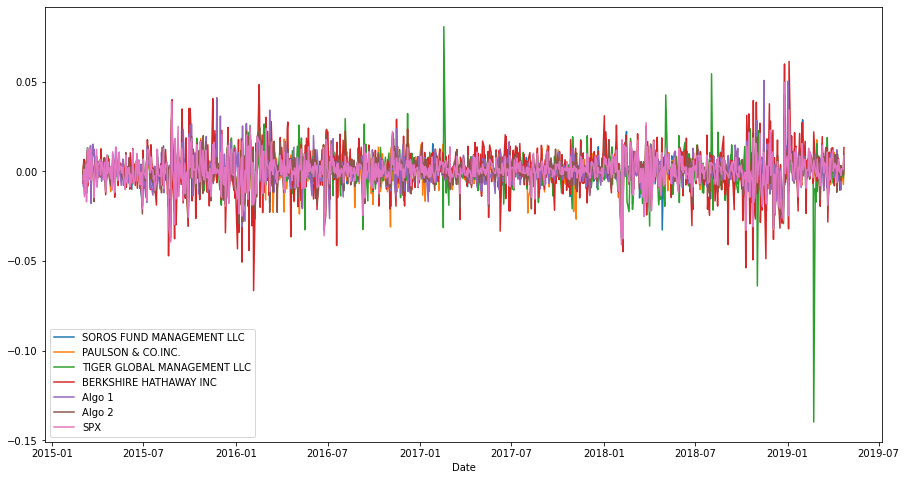

In [18]:
# Plot daily returns of all portfolios
df.plot(figsize=(15, 8))

#### Calculate and Plot cumulative returns.

<AxesSubplot:xlabel='Date'>

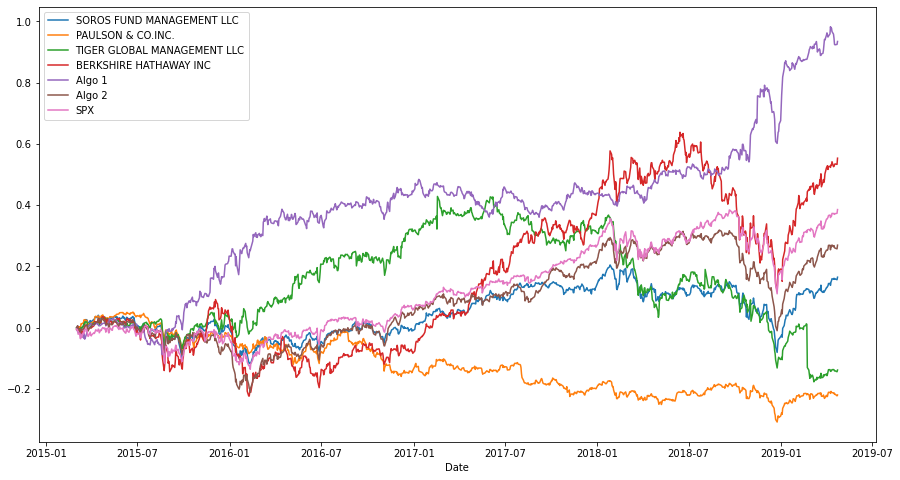

In [19]:
# Calculate cumulative returns of all portfolios
df_cumprod = df.copy()
df_cumprod += 1
df_cumprod = df_cumprod.cumprod() - 1
# Plot cumulative return
df_cumprod.plot(figsize=(15, 8))

---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

### Create a box plot for each portfolio


<AxesSubplot:>

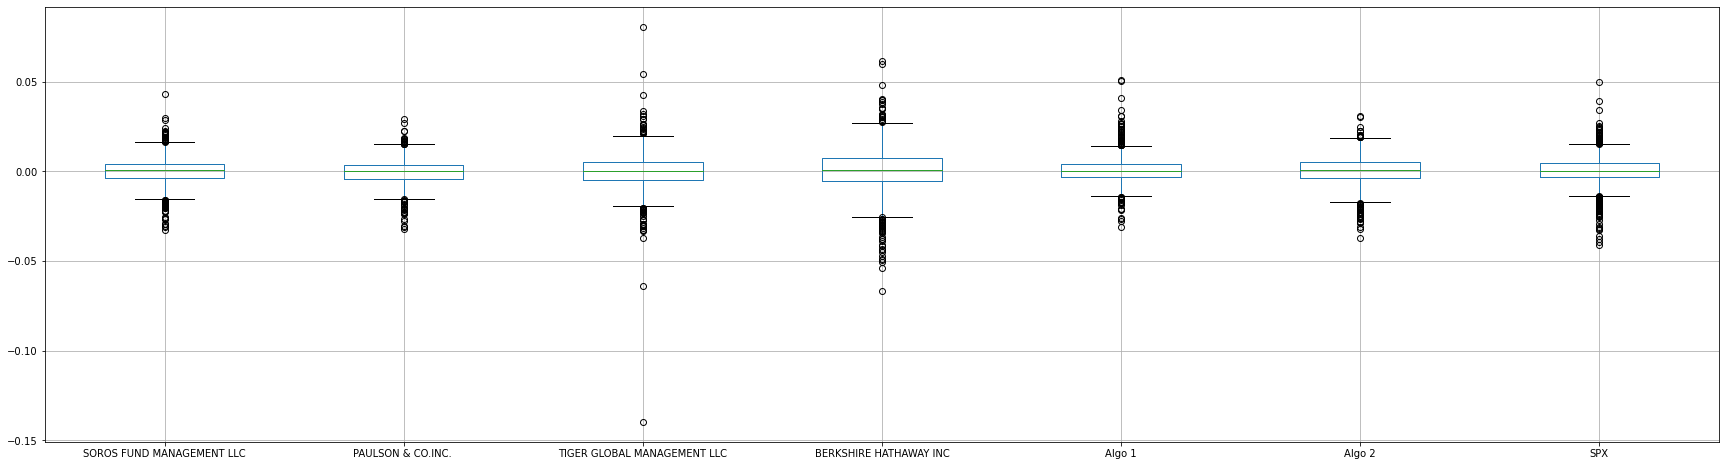

In [20]:
# Box plot to visually show risk
df.boxplot(figsize=(30, 8))

### Calculate Standard Deviations

In [21]:
# Calculate the daily standard deviations of all portfolios
df.std()

SOROS FUND MANAGEMENT LLC      0.007895
PAULSON & CO.INC.              0.007023
TIGER GLOBAL MANAGEMENT LLC    0.010894
BERKSHIRE HATHAWAY INC         0.012919
Algo 1                         0.007620
Algo 2                         0.008342
SPX                            0.008554
dtype: float64

### Determine which portfolios are riskier than the S&P 500

In [22]:
# Calculate  the daily standard deviation of S&P 500
sp500_std = df.SPX.std()
# Determine which portfolios are riskier than the S&P 500
df.columns[df.std() > sp500_std]

Index(['TIGER GLOBAL MANAGEMENT LLC', 'BERKSHIRE HATHAWAY INC'], dtype='object')

### Calculate the Annualized Standard Deviation

In [23]:
# Calculate the annualized standard deviation (252 trading days)
df.std() * np.sqrt(252)

SOROS FUND MANAGEMENT LLC      0.125335
PAULSON & CO.INC.              0.111488
TIGER GLOBAL MANAGEMENT LLC    0.172936
BERKSHIRE HATHAWAY INC         0.205077
Algo 1                         0.120967
Algo 2                         0.132430
SPX                            0.135786
dtype: float64

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for all portfolios using a 21-day window
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P 500
3. Choose one portfolio, then calculate and plot the 60-day rolling beta between it and the S&P 500

### Calculate and plot rolling `std` for all portfolios with 21-day window

<AxesSubplot:xlabel='Date'>

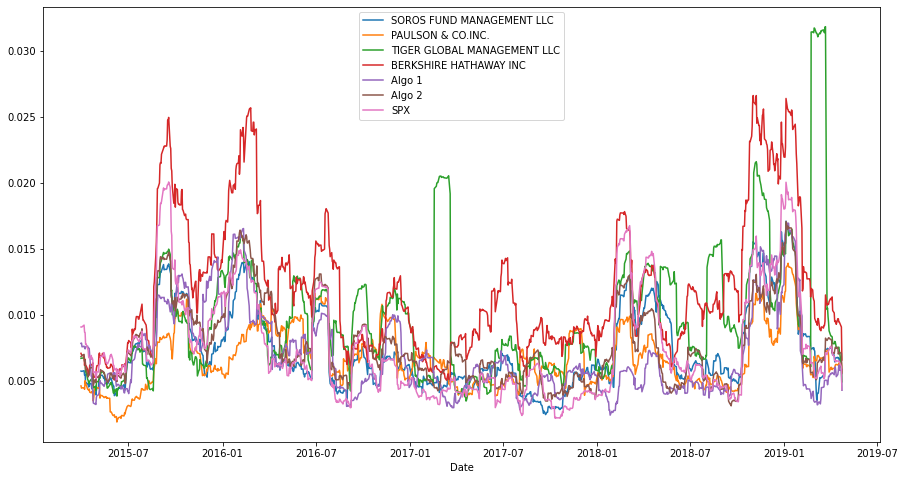

In [24]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
# Plot the rolling standard deviation
df.rolling(21).std().plot(figsize=(15, 8))

### Calculate and plot the correlation

In [25]:
# Calculate the correlation
# Display de correlation matrix
df.corr().style.background_gradient(cmap="summer")

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SPX
SOROS FUND MANAGEMENT LLC,1.000000,0.699914,0.561243,0.754360,0.321211,0.826873,0.837864
PAULSON & CO.INC.,0.699914,1.000000,0.434479,0.545623,0.268840,0.678152,0.669732
TIGER GLOBAL MANAGEMENT LLC,0.561243,0.434479,1.000000,0.424423,0.164387,0.507414,0.623946
BERKSHIRE HATHAWAY INC,0.754360,0.545623,0.424423,1.000000,0.292033,0.688082,0.751371
Algo 1,0.321211,0.268840,0.164387,0.292033,1.000000,0.288243,0.279494
Algo 2,0.826873,0.678152,0.507414,0.688082,0.288243,1.000000,0.858764
SPX,0.837864,0.669732,0.623946,0.751371,0.279494,0.858764,1.000000


### Calculate and Plot Beta for a chosen portfolio and the S&P 500

<AxesSubplot:xlabel='Date'>

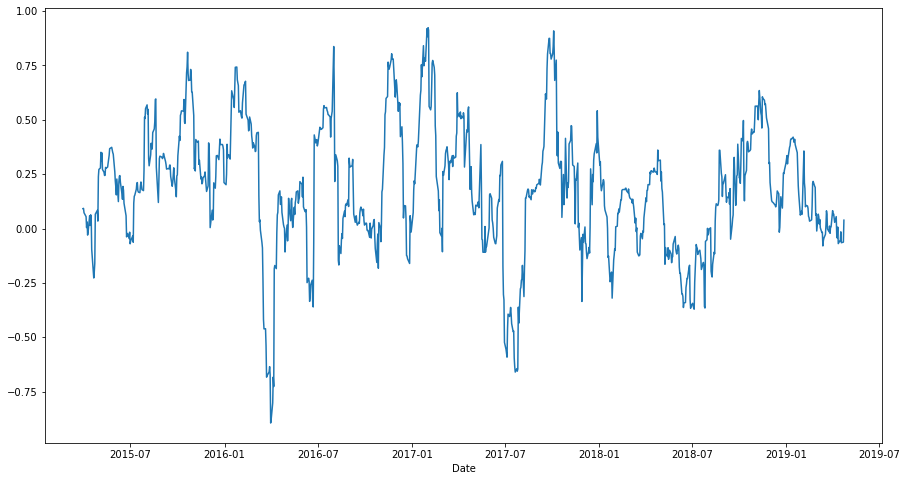

In [26]:
def beta(ser):
    cov_mat = df.loc[ser.index].cov()
    covariance = cov_mat['SPX']['Algo 1']
    variance = cov_mat['SPX']['SPX']
    beta = covariance / variance
    return beta

beta_rolling = df['Algo 1'].rolling(window=21).apply(beta, raw=False)
beta_rolling.plot(figsize=(15, 8))

## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half life for each portfolio, using standard deviation (`std`) as the metric of interest.

<AxesSubplot:xlabel='Date'>

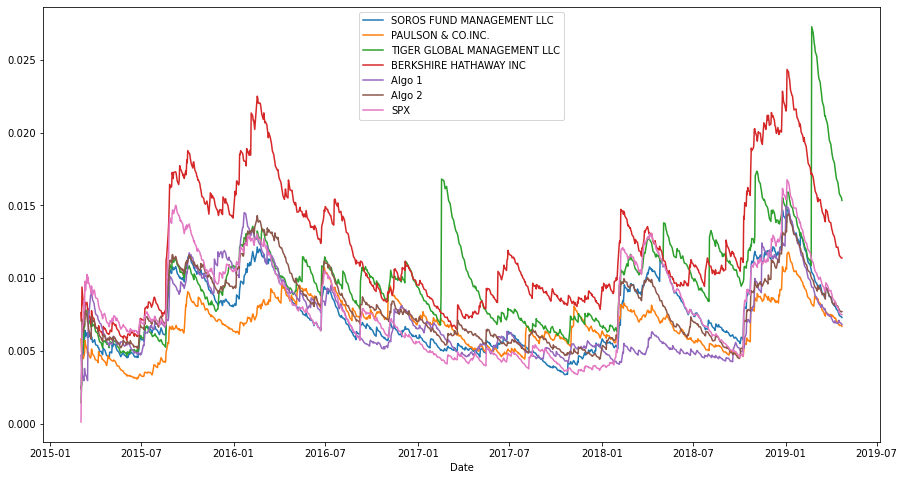

In [27]:
# Use `ewm` to calculate the rolling window
df.ewm(halflife=21).std().plot(figsize=(15, 8))

---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [28]:
# Annualized Sharpe Ratios
sharpes = df.mean() / df.std() * np.sqrt(252)

<AxesSubplot:>

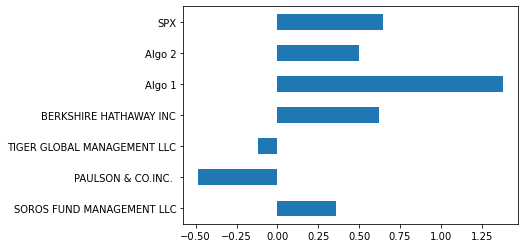

In [29]:
# Visualize the sharpe ratios as a bar plot
sharpes.plot.barh()

### Determine whether the algorithmic strategies outperform both the market (S&P 500) and the whales portfolios.

Algo 1 outperformes all the portfolios by a large margin!  Algo 2 comes behind S&P 500 and Berkshire Hathaway, and beats the rest.

---

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others
5. Include correlation analysis to determine which stocks (if any) are correlated

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

In [30]:
amzn_path = dir_path / "custom_portfolio" / "amzn_historical.csv"
with amzn_path.open() as f:
    amzn = pd.read_csv(f)
    amzn.Date = pd.to_datetime(amzn.Date).dt.date
    amzn.rename(columns={'Close': 'amzn'}, inplace=True)
    amzn.set_index('Date', inplace=True)

In [31]:
dal_path = dir_path / "custom_portfolio" / "dal_historical.csv"
with dal_path.open() as f:
    dal = pd.read_csv(f)
    dal.Date = pd.to_datetime(dal.Date).dt.date
    dal.rename(columns={'Close': 'dal'}, inplace=True)
    dal.set_index('Date', inplace=True)


In [32]:
msft_path = dir_path / "custom_portfolio" / "msft_historical.csv"
with msft_path.open() as f:
    msft = pd.read_csv(f)
    msft.Date = pd.to_datetime(msft.Date).dt.date
    msft.rename(columns={'Close': 'msft'}, inplace=True)
    msft.set_index('Date', inplace=True)


In [33]:
tsla_path = dir_path / "custom_portfolio" / "tsla_historical.csv"
with tsla_path.open() as f:
    tsla = pd.read_csv(f)
    tsla.Date = pd.to_datetime(tsla.Date).dt.date
    tsla.rename(columns={'Close': 'tsla'}, inplace=True)
    tsla.set_index('Date', inplace=True)

In [34]:
df_custom = pd.merge(pd.merge(pd.merge(amzn, dal, on=('Date')), msft, on=('Date')), tsla, on=('Date'))

## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [35]:
# Set weights
weights = [1/4, 1/4, 1/4, 1/4]

df_custom["net"] = df_custom.dot(weights)
df_custom["returns"] = df_custom.net.pct_change()
df_custom.dropna(inplace=True)
df_custom


,amzn,dal,msft,tsla,net,returns
Date,,,,,,
2014-01-03,19.82,29.23,36.91,29.91,28.9675,0.009496
2014-01-06,19.68,29.29,36.13,29.40,28.6250,-0.011824
2014-01-07,19.90,28.78,36.41,29.87,28.7400,0.004017
2014-01-08,20.10,29.80,35.76,30.26,28.9800,0.008351
2014-01-09,20.05,31.06,35.53,29.51,29.0375,0.001984
...,...,...,...,...,...,...
2021-12-23,171.07,39.30,334.69,1067.00,403.0150,0.038538
2021-12-27,169.67,39.00,342.45,1093.94,411.2650,0.020471
2021-12-28,170.66,39.63,341.25,1088.47,410.0025,-0.003070


## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [36]:
# Join your returns DataFrame to the original returns DataFrame

df = pd.merge(df, df_custom.rename(columns={"returns": "personal"})["personal"], on=('Date'))
df.dropna(inplace=True)


In [37]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
df

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SPX,personal
Date,,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.004539,0.001216
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.004389,-0.002429
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001196,-0.005547
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.014174,-0.021086
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.003944,0.004238
...,...,...,...,...,...,...,...,...
2019-04-16,0.002699,0.000388,-0.000831,0.000837,-0.006945,0.002899,0.000509,0.008271
2019-04-17,-0.002897,-0.006467,-0.004409,0.003222,-0.010301,-0.005228,-0.002274,0.003030
2019-04-18,0.001448,0.001222,0.000582,0.001916,-0.000588,-0.001229,0.001579,0.004822


## Re-run the risk analysis with your portfolio to see how it compares to the others

<AxesSubplot:xlabel='Date'>

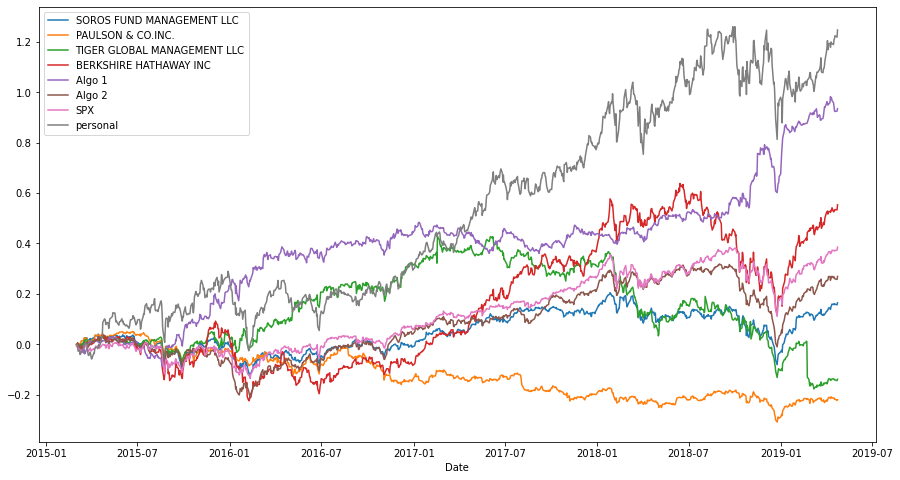

In [38]:
df_cumprod = df.copy()
df_cumprod += 1
df_cumprod = df_cumprod.cumprod() - 1
df_cumprod.plot(figsize=(15, 8))

### Calculate the Annualized Standard Deviation

In [39]:
# Calculate the annualized `std`
df.std() * np.sqrt(252)

SOROS FUND MANAGEMENT LLC      0.125335
PAULSON & CO.INC.              0.111488
TIGER GLOBAL MANAGEMENT LLC    0.172936
BERKSHIRE HATHAWAY INC         0.205077
Algo 1                         0.120967
Algo 2                         0.132430
SPX                            0.135786
personal                       0.222445
dtype: float64

### Calculate and plot rolling `std` with 21-day window

<AxesSubplot:xlabel='Date'>

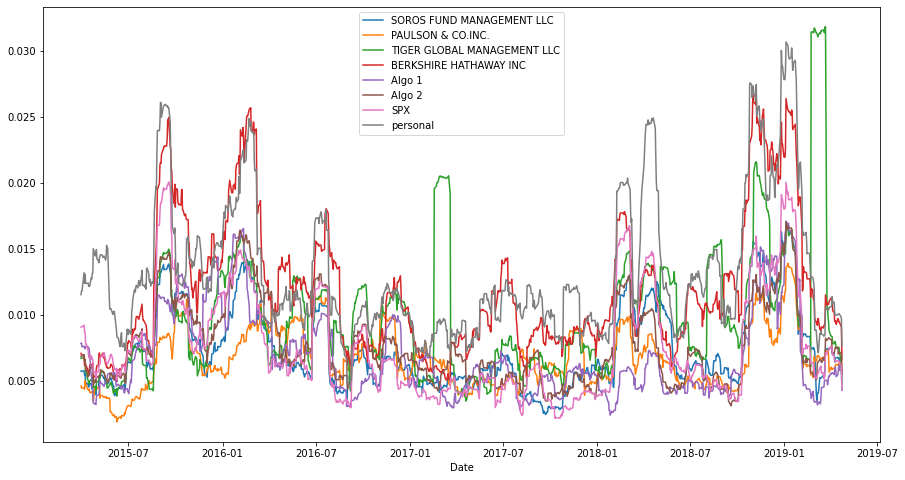

In [40]:
df.rolling(21).std().plot(figsize=(15, 8))

### Calculate and plot the correlation

In [41]:
# Calculate and plot the correlation
df.corr().style.background_gradient(cmap="summer")

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SPX,personal
SOROS FUND MANAGEMENT LLC,1.000000,0.699914,0.561243,0.754360,0.321211,0.826873,0.837864,0.681592
PAULSON & CO.INC.,0.699914,1.000000,0.434479,0.545623,0.268840,0.678152,0.669732,0.509231
TIGER GLOBAL MANAGEMENT LLC,0.561243,0.434479,1.000000,0.424423,0.164387,0.507414,0.623946,0.465270
BERKSHIRE HATHAWAY INC,0.754360,0.545623,0.424423,1.000000,0.292033,0.688082,0.751371,0.722118
Algo 1,0.321211,0.268840,0.164387,0.292033,1.000000,0.288243,0.279494,0.244438
Algo 2,0.826873,0.678152,0.507414,0.688082,0.288243,1.000000,0.858764,0.664757
SPX,0.837864,0.669732,0.623946,0.751371,0.279494,0.858764,1.000000,0.781349
personal,0.681592,0.509231,0.465270,0.722118,0.244438,0.664757,0.781349,1.000000


### Calculate and Plot Rolling 60-day Beta for Your Portfolio compared to the S&P 500

Beta: 1.280004596742567


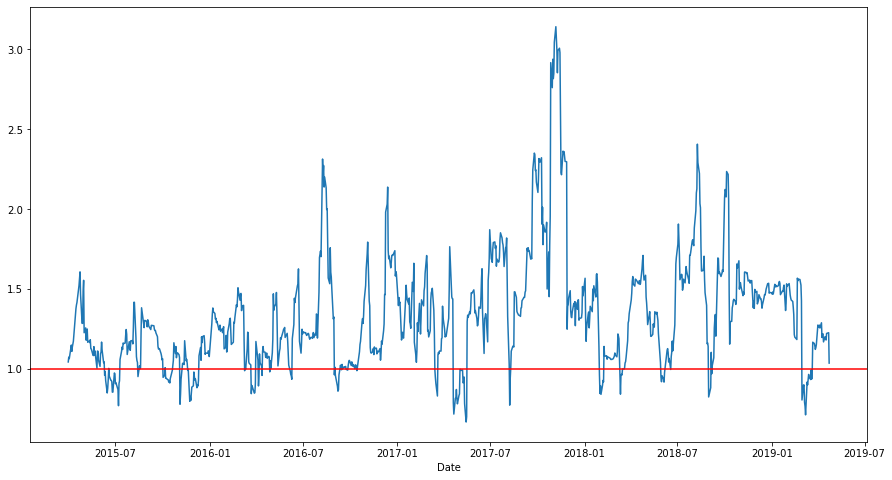

In [42]:
# Calculate and plot Beta
def beta_personal(ser):
    cov_mat = df.loc[ser.index].cov()
    covariance = cov_mat['SPX']['personal']
    variance = cov_mat['SPX']['SPX']
    beta = covariance / variance
    return beta

beta_rolling = df['personal'].rolling(window=21).apply(beta_personal, raw=False)
ax = beta_rolling.plot(figsize=(15, 8))
ax.axhline(y=1, color='r')

print(f"Beta: {beta_personal(df.personal)}")

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

<AxesSubplot:>

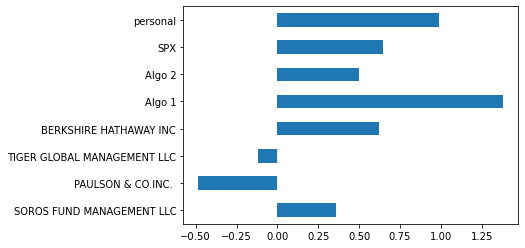

In [43]:
# Calculate Annualized Sharpe Ratios
sharpes = df.mean() / df.std() * np.sqrt(252)
sharpes.plot.barh()

In [44]:
print(f"Personal: {sharpes.personal}")
print(f"SPX: {sharpes.SPX}")

Personal: 0.9910254952382296
SPX: 0.6482674543765827


### How does your portfolio do?

My portfolio consisting of an equal ratio of AMZN, DAL, MSFT, TSLA performs quite well. The portfolio's sharpe ratio of 0.99 greatly outperforms the S&P 500 with sharpe ratio 0.65. 

It is to be noted that despite the great return to risk ratio, my portfolio had the highest annualized standard deviation. Additionally, it has very high systematic risk, with a beta of 1.28.

With a looming recession, it might be worth looking for a portfolio with a negative beta...